In this project, we will be working on a survey about Star Wars movies. This survey covers answers of the fans to the questions about the Star Wars movies. Using this data, we will try to find out which movies of the series are watched and liked more. We will analyze change in the number of views and ratings by gender and education.

## Importing required modules

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline

## Reading and exploring the data set

The data has a different encoding than default one so encoding parameter has to be entered. 

In [4]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

Look at the first 10 rows of dataframe to explore it

In [5]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

Look at the columns of the dataframe.

In [6]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Preparation of the data

Data has a column named "Respondent". All values in this column are unique and have to be present. Null ones have to be deleted. 

In [7]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

In "Have you seen any of the 6 films in the Star Wars franchise?" and "Do you consider yourself to be a fan of the Star Wars film franchise?" columns, there are two different values: yes and no. Answers to these questions are kept as yes and no in the data. 

Questions of "Have you seen any of the 6 films in the Star Wars franchise?" and "Do you consider yourself to be a fan of the Star Wars film franchise?" are asked to the fans in the survey. True and False is more useful for data processing instead of yes and no, so we will change yes and no with true and false. 

In [8]:
yes_no = {"Yes":True, "No":False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

Let's take a look at the data after this process.

In [9]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


In the survey, fans are asked which movies of the series they watched. Again, getting yes and no answers. Therefore, we will replace yes and no values with true and false for these columns also.

In [10]:
movie_names = ["Star Wars: Episode I  The Phantom Menace", "Star Wars: Episode II  Attack of the Clones",
               "Star Wars: Episode III  Revenge of the Sith", "Star Wars: Episode IV  A New Hope",
               "Star Wars: Episode V The Empire Strikes Back", "Star Wars: Episode VI Return of the Jedi"]

for i in range(6):
    star_wars.iloc[:,i+3] = star_wars.iloc[:,i+3].map({movie_names[i]:True, np.NaN:False})

Let's change the names of the columns to be more clear.

In [11]:
col_names = {}

for i in range(6):
    col_names[star_wars.columns[i+3]] = "seen_"+str(i+1)

star_wars = star_wars.rename(columns=col_names)

Some columns of data contain numerical values but these values are in string type. Their types have to be changed as float instead of string. Data set would be much more useful in this way. 

In [12]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

Again, some column names are changed to be more related with values they have.

In [13]:
col_names = {}

for i in range(0,6):
    col_names[star_wars.columns[i+9]] = "ranking_"+str(i+1)  

star_wars = star_wars.rename(columns=col_names)

## Analyzing the data

New four sub-data sets are created from the main data set. Name of these data sets are Males, Females, Fans and not_Fans. Males and Females data sets are based on gender of respondents. Fans and not_Fans data sets are created according to respondents describing themselves as a fan of movies or not. 

In [14]:
males = star_wars[star_wars["Gender"]=="Male"]
females = star_wars[star_wars["Gender"]=="Female"]

fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==True]
not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==False]

Firstly, number of views of the movies are analyzed generally. And then according to their genders and whether to be a fan or not, respectively. 

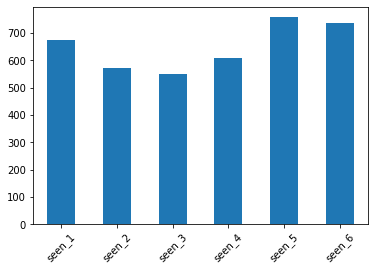

In [47]:
star_wars.iloc[:,3:9].sum().plot(kind="bar", rot=45)

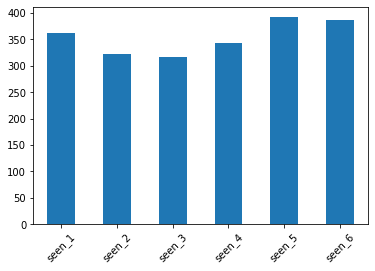

In [48]:
males.iloc[:,3:9].sum().plot(kind="bar", rot=45)

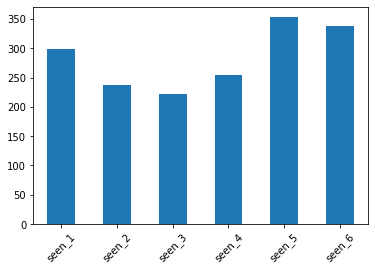

In [49]:
females.iloc[:,3:9].sum().plot(kind="bar", rot=45)

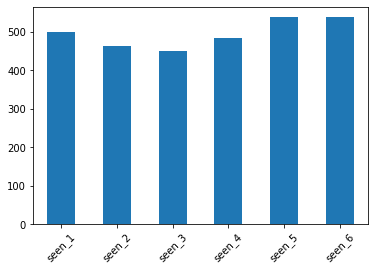

In [50]:
fans.iloc[:,3:9].sum().plot(kind="bar", rot=45)

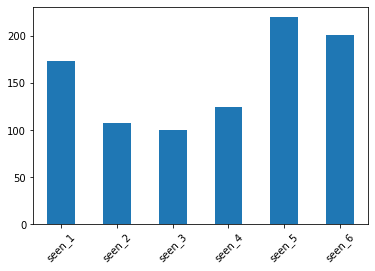

In [51]:
not_fans.iloc[:,3:9].sum().plot(kind="bar", rot=45)

Secondly, ratings of the movies are analyzed generally. And then according to their genders and whether to be a fan or not, respectively. 

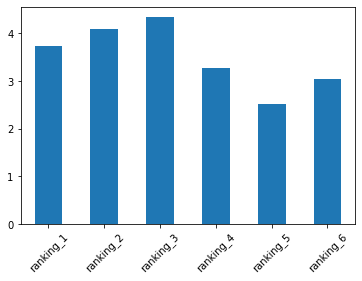

In [52]:
star_wars.iloc[:,9:15].mean().plot(kind="bar", rot=45)

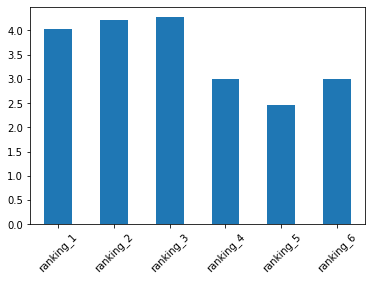

In [53]:
males.iloc[:,9:15].mean().plot(kind="bar", rot=45)

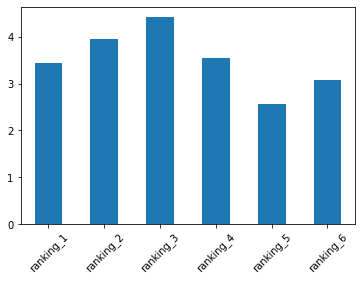

In [55]:
females.iloc[:,9:15].mean().plot(kind="bar", rot=45)

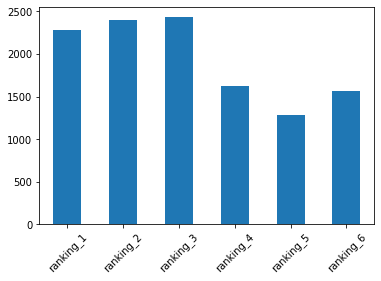

In [56]:
fans.iloc[:,9:15].sum().plot(kind="bar", rot=45)

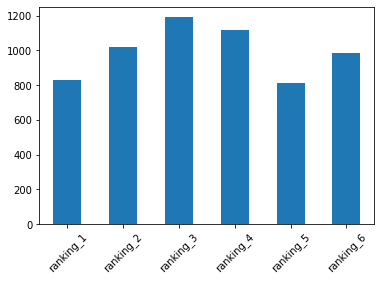

In [57]:
not_fans.iloc[:,9:15].sum().plot(kind="bar", rot=45)

Finally, data will be analyzed for different education levels of respondents. Look at the number of respondents for different education levels.

In [25]:
star_wars["Education"].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

The number of respondents having degree less than high school is too low to analyze so it will be dropped. 

In [26]:
education = star_wars.groupby(['Education']).mean().drop("Less than high school degree")

Let's look at the view numbers according to education degrees. 

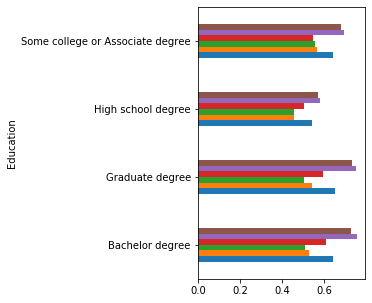

In [46]:
education.iloc[:,2:8].plot(kind="barh", legend=None, figsize=(3,5))

Then, rating of the movies for different education levels. 

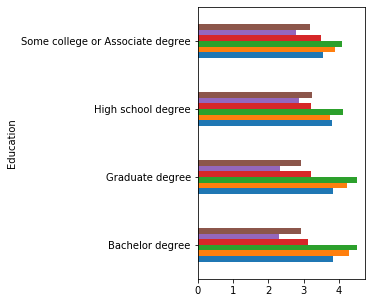

In [44]:
education.iloc[:,8:14].plot(kind="barh", legend=None, figsize=(3,5))

In [58]:
education.iloc[:,8:14]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Education,,,,,,
Bachelor degree,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
Graduate degree,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354
High school degree,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
Some college or Associate degree,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228


## Results

The most viewed movie is 5th one of the serie and the least is 3rd one in general and all sub-groups. Not surprisingly, most and least liked movies are the same. 

Gneder, to be a fan or not, or education do not affect feelings of the respondents about movies. 